In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=34) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_GrayScale_12_Out-127                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.50
Params size (MB): 83.17
Estimated Total Size (MB): 280.07
----------------------------------------------------------------


In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True)

Number of Training Images: 105,497
Number of Validation Images: 26,251


Positivity Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum    18.514798
Cardiomegaly                   7.904955
Lung_Opacity                   1.200559
Lung_Lesion                   22.606400
Edema                          3.309518
Consolidation                 15.716368
Pneumonia                     36.291269
Atelectasis                    5.374441
Pneumothorax                  11.418717
Pleural_Effusion               1.941339
Pleural_Other                 73.556184
Fracture                      21.614577
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 972.4759         
Training Time: 0:21:10.227694          
Validation Time: 0:02:56.795137

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.125179,0.589662,0.206517,0.792127,0.363836
4,Edema,24480,0.234967,0.554837,0.330129,0.769065,0.473364
5,Consolidation,6311,0.000000,0.000000,0.000000,0.654821,0.095887
7,Atelectasis,16550,0.000121,0.400000,0.000242,0.612079,0.210340
9,Pleural_Effusion,35867,0.545738,0.663076,0.598712,0.805422,0.669327



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.416945,0.476917,0.444919,0.828370,0.446064
4,Edema,6019,0.195381,0.611227,0.296110,0.795005,0.509048
5,Consolidation,1612,0.000000,0.000000,0.000000,0.695221,0.116924
7,Atelectasis,4068,0.000000,0.000000,0.000000,0.650459,0.231489
9,Pleural_Effusion,8867,0.569302,0.719703,0.635728,0.841430,0.724189


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 929.5203         
Training Time: 0:19:39.436471          
Validation Time: 0:02:36.242111

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.215920,0.621477,0.320491,0.834749,0.448644
4,Edema,24480,0.309150,0.588629,0.405389,0.796789,0.517851
5,Consolidation,6311,0.000000,0.000000,0.000000,0.689447,0.112898
7,Atelectasis,16550,0.000121,0.250000,0.000242,0.640056,0.229130
9,Pleural_Effusion,35867,0.631974,0.703442,0.665795,0.847021,0.731886



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.334890,0.590241,0.427325,0.850188,0.489407
4,Edema,6019,0.123442,0.671183,0.208532,0.798244,0.516904
5,Consolidation,1612,0.000000,0.000000,0.000000,0.717929,0.132662
7,Atelectasis,4068,0.000246,1.000000,0.000492,0.648544,0.235442
9,Pleural_Effusion,8867,0.544491,0.738565,0.626850,0.851598,0.738083


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 912.0642         
Training Time: 0:19:41.402221          
Validation Time: 0:02:36.655974

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.247151,0.633355,0.355556,0.846235,0.473529
4,Edema,24480,0.336356,0.600671,0.431235,0.806982,0.534421
5,Consolidation,6311,0.000000,0.000000,0.000000,0.705045,0.123918
7,Atelectasis,16550,0.000242,0.181818,0.000483,0.656611,0.243252
9,Pleural_Effusion,35867,0.652884,0.712890,0.681569,0.858024,0.749058



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.117412,0.770241,0.203763,0.838571,0.485314
4,Edema,6019,0.300881,0.610793,0.403161,0.812574,0.531608
5,Consolidation,1612,0.000000,0.000000,0.000000,0.697006,0.118682
7,Atelectasis,4068,0.003687,0.441176,0.007314,0.664715,0.251266
9,Pleural_Effusion,8867,0.694485,0.689740,0.692105,0.855936,0.744102


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 900.3222         
Training Time: 0:19:42.390576          
Validation Time: 0:02:36.525347

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.259981,0.634790,0.368884,0.852449,0.484846
4,Edema,24480,0.354126,0.600721,0.445581,0.813739,0.545025
5,Consolidation,6311,0.000000,0.000000,0.000000,0.715805,0.132254
7,Atelectasis,16550,0.000604,0.384615,0.001207,0.664592,0.249350
9,Pleural_Effusion,35867,0.665124,0.720159,0.691548,0.864882,0.760094



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.359907,0.612720,0.453457,0.854196,0.509843
4,Edema,6019,0.661406,0.485665,0.560073,0.813836,0.545053
5,Consolidation,1612,0.000000,0.000000,0.000000,0.722384,0.142369
7,Atelectasis,4068,0.001475,0.750000,0.002944,0.674526,0.257713
9,Pleural_Effusion,8867,0.619601,0.739933,0.674441,0.867669,0.763530


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 891.0239         
Training Time: 0:19:42.403482          
Validation Time: 0:02:37.062938

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.269857,0.640296,0.379691,0.857342,0.497065
4,Edema,24480,0.366953,0.609596,0.458129,0.817753,0.555126
5,Consolidation,6311,0.000158,0.333333,0.000317,0.723891,0.136740
7,Atelectasis,16550,0.000906,0.441176,0.001809,0.672710,0.256462
9,Pleural_Effusion,35867,0.676639,0.725813,0.700364,0.870056,0.767039



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.425617,0.563604,0.484987,0.858829,0.512887
4,Edema,6019,0.412527,0.603256,0.489985,0.826495,0.564565
5,Consolidation,1612,0.000000,0.000000,0.000000,0.734809,0.143748
7,Atelectasis,4068,0.000492,0.500000,0.000982,0.677353,0.259710
9,Pleural_Effusion,8867,0.667982,0.728268,0.696824,0.871647,0.769507


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 881.8420         
Training Time: 0:19:39.559121          
Validation Time: 0:02:36.333888

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.286655,0.651323,0.398101,0.862104,0.505059
4,Edema,24480,0.384355,0.618769,0.474172,0.823377,0.564335
5,Consolidation,6311,0.000634,0.400000,0.001266,0.731680,0.145201
7,Atelectasis,16550,0.001934,0.450704,0.003851,0.680757,0.263696
9,Pleural_Effusion,35867,0.682968,0.728571,0.705032,0.874335,0.774864



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.248833,0.683150,0.364792,0.850483,0.505270
4,Edema,6019,0.272803,0.642410,0.382974,0.827357,0.568499
5,Consolidation,1612,0.000620,1.000000,0.001240,0.731904,0.148903
7,Atelectasis,4068,0.000246,1.000000,0.000492,0.681312,0.262706
9,Pleural_Effusion,8867,0.821022,0.633539,0.715198,0.865554,0.759530


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 874.0792         
Training Time: 0:19:37.506628          
Validation Time: 0:02:36.297962

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.308010,0.659855,0.419980,0.866546,0.523739
4,Edema,24480,0.396691,0.622181,0.484484,0.827599,0.573555
5,Consolidation,6311,0.000792,0.312500,0.001581,0.735942,0.152567
7,Atelectasis,16550,0.002236,0.435294,0.004448,0.683950,0.268278
9,Pleural_Effusion,35867,0.690579,0.730735,0.710090,0.877373,0.780151



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.197799,0.739401,0.312105,0.858744,0.516340
4,Edema,6019,0.495099,0.579879,0.534146,0.827523,0.572851
5,Consolidation,1612,0.000000,0.000000,0.000000,0.738894,0.151700
7,Atelectasis,4068,0.107178,0.336160,0.162535,0.681933,0.262275
9,Pleural_Effusion,8867,0.707567,0.714823,0.711177,0.871749,0.769242


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 867.2312         
Training Time: 0:19:37.320128          
Validation Time: 0:02:36.716841

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.313835,0.667265,0.426890,0.868683,0.528162
4,Edema,24480,0.402124,0.626169,0.489739,0.830769,0.579414
5,Consolidation,6311,0.001426,0.375000,0.002841,0.741301,0.156115
7,Atelectasis,16550,0.003021,0.520833,0.006007,0.689676,0.275441
9,Pleural_Effusion,35867,0.694817,0.736023,0.714827,0.879985,0.784361



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.319880,0.635099,0.425466,0.858608,0.515917
4,Edema,6019,0.357701,0.640202,0.458964,0.830392,0.574703
5,Consolidation,1612,0.002481,0.222222,0.004908,0.739971,0.149862
7,Atelectasis,4068,0.015733,0.450704,0.030404,0.684884,0.265959
9,Pleural_Effusion,8867,0.713432,0.705633,0.709511,0.872713,0.767567


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 860.4981         
Training Time: 0:19:47.102707          
Validation Time: 0:02:37.965530

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.321516,0.658997,0.432178,0.872137,0.536464
4,Edema,24480,0.414788,0.628458,0.499742,0.834758,0.585043
5,Consolidation,6311,0.002218,0.358974,0.004409,0.747850,0.162697
7,Atelectasis,16550,0.003867,0.484848,0.007673,0.693745,0.279442
9,Pleural_Effusion,35867,0.696741,0.737255,0.716426,0.882878,0.789550



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.403269,0.585756,0.477677,0.861328,0.515311
4,Edema,6019,0.305034,0.637721,0.412677,0.824747,0.561565
5,Consolidation,1612,0.004963,0.275862,0.009750,0.741815,0.156300
7,Atelectasis,4068,0.052114,0.353333,0.090831,0.681453,0.260980
9,Pleural_Effusion,8867,0.692455,0.723630,0.707699,0.874541,0.774008


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 852.5449         
Training Time: 0:20:00.743158          
Validation Time: 0:02:37.465231

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.333165,0.663250,0.443533,0.876864,0.545324
4,Edema,24480,0.425899,0.637130,0.510528,0.837978,0.593409
5,Consolidation,6311,0.004754,0.545455,0.009425,0.751355,0.169876
7,Atelectasis,16550,0.006767,0.480687,0.013347,0.699587,0.286329
9,Pleural_Effusion,35867,0.704603,0.740485,0.722098,0.886008,0.794838



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.275517,0.672091,0.390821,0.861691,0.520319
4,Edema,6019,0.316332,0.643896,0.424242,0.831862,0.578473
5,Consolidation,1612,0.004963,0.363636,0.009792,0.743543,0.157962
7,Atelectasis,4068,0.005162,0.600000,0.010236,0.685574,0.270292
9,Pleural_Effusion,8867,0.671027,0.738213,0.703019,0.877779,0.780857


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 845.5024         
Training Time: 0:19:40.831728          
Validation Time: 0:02:36.458531

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.343631,0.668802,0.453998,0.879431,0.553442
4,Edema,24480,0.428799,0.633341,0.511375,0.840894,0.600336
5,Consolidation,6311,0.006338,0.547945,0.012531,0.757773,0.177411
7,Atelectasis,16550,0.008097,0.476868,0.015923,0.705721,0.291624
9,Pleural_Effusion,35867,0.708953,0.743248,0.725695,0.888770,0.799856



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.307538,0.642061,0.415877,0.864199,0.519927
4,Edema,6019,0.464363,0.603020,0.524686,0.832594,0.580352
5,Consolidation,1612,0.001861,0.428571,0.003706,0.742145,0.155331
7,Atelectasis,4068,0.004425,0.580645,0.008783,0.685229,0.266818
9,Pleural_Effusion,8867,0.644750,0.745372,0.691419,0.875119,0.777018


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 837.2546         
Training Time: 0:19:40.547502          
Validation Time: 0:02:36.616110

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.359754,0.676186,0.469642,0.883252,0.564410
4,Edema,24480,0.444322,0.641257,0.524926,0.844712,0.607667
5,Consolidation,6311,0.006655,0.432990,0.013109,0.763147,0.186153
7,Atelectasis,16550,0.010151,0.470588,0.019873,0.709369,0.295961
9,Pleural_Effusion,35867,0.713497,0.748669,0.730660,0.891312,0.804494



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.155771,0.744817,0.257655,0.859276,0.510205
4,Edema,6019,0.310018,0.655657,0.420981,0.828043,0.573235
5,Consolidation,1612,0.003102,0.454545,0.006161,0.740673,0.150140
7,Atelectasis,4068,0.005900,0.470588,0.011653,0.679789,0.264381
9,Pleural_Effusion,8867,0.689072,0.729030,0.708488,0.875820,0.777966


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 828.8615         
Training Time: 0:19:40.236350          
Validation Time: 0:02:36.409664

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.371824,0.680624,0.480921,0.886672,0.575294
4,Edema,24480,0.453391,0.646644,0.533042,0.848797,0.617306
5,Consolidation,6311,0.011250,0.559055,0.022057,0.768067,0.196438
7,Atelectasis,16550,0.016193,0.508539,0.031387,0.714715,0.303007
9,Pleural_Effusion,35867,0.716229,0.749344,0.732412,0.893938,0.809045



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.317211,0.634000,0.422855,0.859457,0.518558
4,Edema,6019,0.386111,0.631350,0.479175,0.832246,0.576953
5,Consolidation,1612,0.024194,0.397959,0.045614,0.743975,0.158092
7,Atelectasis,4068,0.036136,0.410615,0.066426,0.690424,0.273830
9,Pleural_Effusion,8867,0.730348,0.705831,0.717881,0.876405,0.777781


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 819.8227         
Training Time: 0:19:40.690117          
Validation Time: 0:02:36.284975

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.380603,0.684115,0.489099,0.890370,0.582830
4,Edema,24480,0.469526,0.653848,0.546566,0.853343,0.626280
5,Consolidation,6311,0.017271,0.641176,0.033637,0.774385,0.206880
7,Atelectasis,16550,0.017885,0.519298,0.034579,0.719790,0.309831
9,Pleural_Effusion,35867,0.726406,0.756109,0.740960,0.897063,0.815148



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.330220,0.603659,0.426908,0.860867,0.508612
4,Edema,6019,0.382289,0.634934,0.477237,0.831305,0.577056
5,Consolidation,1612,0.013027,0.355932,0.025135,0.736311,0.157452
7,Atelectasis,4068,0.006637,0.450000,0.013081,0.680757,0.260672
9,Pleural_Effusion,8867,0.667306,0.733119,0.698666,0.875419,0.776946


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 809.7752         
Training Time: 0:19:40.494642          
Validation Time: 0:02:36.375753

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.397147,0.694055,0.505208,0.894014,0.595382
4,Edema,24480,0.477900,0.656252,0.553053,0.857243,0.634720
5,Consolidation,6311,0.021867,0.565574,0.042105,0.781774,0.213535
7,Atelectasis,16550,0.027553,0.534584,0.052405,0.728132,0.322586
9,Pleural_Effusion,35867,0.729110,0.757539,0.743053,0.899854,0.819253



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.294530,0.640784,0.403565,0.858408,0.506565
4,Edema,6019,0.417179,0.611395,0.495951,0.830028,0.572323
5,Consolidation,1612,0.009926,0.410256,0.019382,0.733899,0.150757
7,Atelectasis,4068,0.013766,0.444444,0.026705,0.682158,0.264393
9,Pleural_Effusion,8867,0.764069,0.684205,0.721935,0.875206,0.775394


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 798.5187         
Training Time: 0:19:38.014275          
Validation Time: 0:02:36.074537

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.407361,0.692993,0.513104,0.898816,0.606098
4,Edema,24480,0.491953,0.661922,0.564419,0.862142,0.645591
5,Consolidation,6311,0.027096,0.558824,0.051685,0.788630,0.227219
7,Atelectasis,16550,0.036435,0.551188,0.068352,0.733931,0.329259
9,Pleural_Effusion,35867,0.736081,0.762352,0.748986,0.903988,0.826719



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.278185,0.655145,0.390541,0.856402,0.501183
4,Edema,6019,0.300382,0.662514,0.413352,0.830463,0.574609
5,Consolidation,1612,0.011166,0.409091,0.021739,0.742938,0.157744
7,Atelectasis,4068,0.009833,0.571429,0.019333,0.684460,0.268684
9,Pleural_Effusion,8867,0.703507,0.715367,0.709388,0.873523,0.772620


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 786.4515         
Training Time: 0:19:36.887341          
Validation Time: 0:02:35.832185

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.425087,0.701588,0.529409,0.903413,0.618572
4,Edema,24480,0.501879,0.666233,0.572494,0.865919,0.653097
5,Consolidation,6311,0.035335,0.550617,0.066409,0.798238,0.240205
7,Atelectasis,16550,0.046344,0.566470,0.085679,0.740052,0.340266
9,Pleural_Effusion,35867,0.742772,0.767155,0.754767,0.907336,0.832345



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.182121,0.710938,0.289963,0.854147,0.497670
4,Edema,6019,0.396245,0.609974,0.480411,0.827988,0.569950
5,Consolidation,1612,0.013027,0.355932,0.025135,0.738471,0.150538
7,Atelectasis,4068,0.051131,0.374101,0.089965,0.683888,0.264368
9,Pleural_Effusion,8867,0.670576,0.717509,0.693249,0.868152,0.765417


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 772.1570         
Training Time: 0:19:36.239029          
Validation Time: 0:02:36.067581

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.448046,0.708111,0.548829,0.908319,0.637397
4,Edema,24480,0.517647,0.675912,0.586287,0.872165,0.668274
5,Consolidation,6311,0.048170,0.598425,0.089163,0.806731,0.258458
7,Atelectasis,16550,0.060544,0.553285,0.109144,0.750081,0.352759
9,Pleural_Effusion,35867,0.748711,0.774069,0.761179,0.911249,0.839225



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.350233,0.597950,0.441733,0.854059,0.499155
4,Edema,6019,0.459545,0.582193,0.513649,0.822026,0.564039
5,Consolidation,1612,0.011166,0.400000,0.021726,0.725804,0.145136
7,Atelectasis,4068,0.034661,0.345588,0.063003,0.679351,0.259293
9,Pleural_Effusion,8867,0.690200,0.713370,0.701593,0.868727,0.766597


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 757.5746         
Training Time: 0:19:36.620004          
Validation Time: 0:02:36.087496

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.458597,0.710382,0.557374,0.912643,0.645907
4,Edema,24480,0.530351,0.679774,0.595837,0.876557,0.675890
5,Consolidation,6311,0.058469,0.630769,0.107019,0.817969,0.276870
7,Atelectasis,16550,0.078973,0.577297,0.138939,0.758781,0.369053
9,Pleural_Effusion,35867,0.756210,0.778323,0.767107,0.915179,0.846849



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.373249,0.564866,0.449488,0.851912,0.491407
4,Edema,6019,0.338096,0.639937,0.442439,0.824401,0.569951
5,Consolidation,1612,0.045285,0.277567,0.077867,0.729053,0.149082
7,Atelectasis,4068,0.034415,0.376344,0.063063,0.677047,0.261864
9,Pleural_Effusion,8867,0.753017,0.675468,0.712137,0.868299,0.764737


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 740.1998         
Training Time: 0:19:37.150665          
Validation Time: 0:02:36.125424

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11847,0.485186,0.722928,0.580665,0.918286,0.666049
4,Edema,24480,0.547590,0.690944,0.610971,0.882511,0.691918
5,Consolidation,6311,0.080019,0.628892,0.141974,0.829970,0.301065
7,Atelectasis,16550,0.097583,0.584933,0.167262,0.767972,0.385678
9,Pleural_Effusion,35867,0.764965,0.786138,0.775407,0.920402,0.855984



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2998,0.367912,0.580832,0.450480,0.851305,0.489615
4,Edema,6019,0.338594,0.625921,0.439461,0.820483,0.557197
5,Consolidation,1612,0.013648,0.309859,0.026144,0.716906,0.139427
7,Atelectasis,4068,0.027286,0.373737,0.050859,0.673963,0.258895
9,Pleural_Effusion,8867,0.646893,0.733223,0.687358,0.868677,0.766797



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.325943
Hamming Loss,0.092217
Combined Recall,0.412502
Combined Precision,0.484389
Combined F1,0.421978


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5406,0.122457,0.700529,0.208471,0.808619,0.313013
1,Cardiomegaly,11847,0.485186,0.722928,0.580665,0.918286,0.666049
2,Lung_Opacity,47941,0.698066,0.680397,0.689118,0.788269,0.735517
3,Lung_Lesion,4469,0.161781,0.699226,0.262766,0.872969,0.375296
4,Edema,24480,0.547590,0.690944,0.610971,0.882511,0.691918
5,Consolidation,6311,0.080019,0.628892,0.141974,0.829970,0.301065
6,Pneumonia,2829,0.030046,0.582192,0.057143,0.839726,0.195040
7,Atelectasis,16550,0.097583,0.584933,0.167262,0.767972,0.385678
8,Pneumothorax,8495,0.470394,0.756818,0.580181,0.931443,0.674466
9,Pleural_Effusion,35867,0.764965,0.786138,0.775407,0.920402,0.855984


***** ROC *****


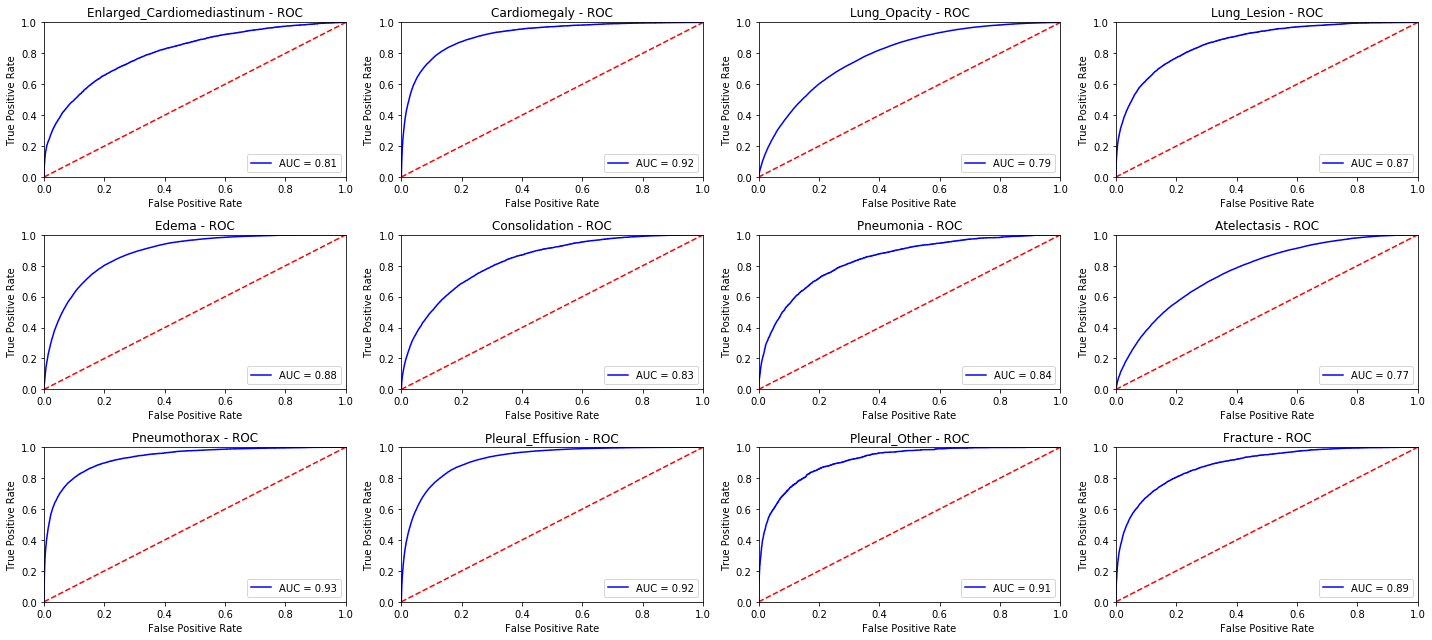

***** Precision / Recall *****


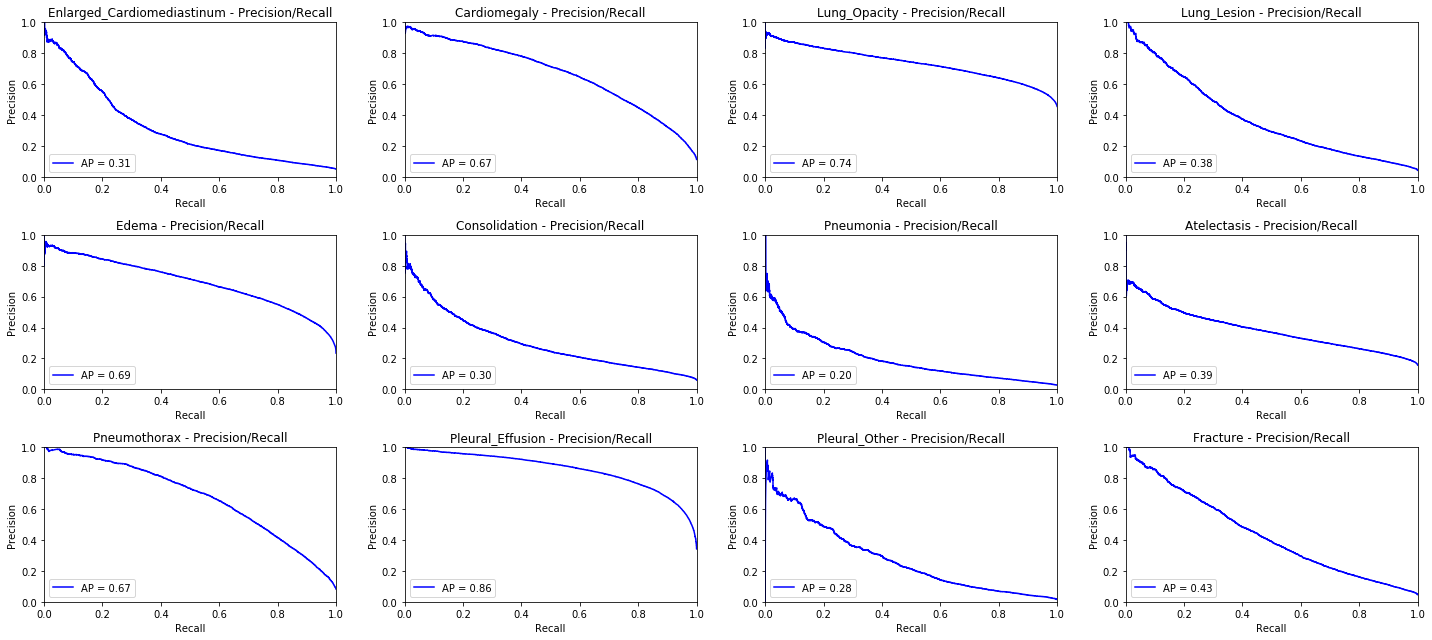


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.266276
Hamming Loss,0.109818
Combined Recall,0.312795
Combined Precision,0.394398
Combined F1,0.327245


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1382,0.043415,0.333333,0.076825,0.674691,0.133435
1,Cardiomegaly,2998,0.367912,0.580832,0.450480,0.851305,0.489615
2,Lung_Opacity,11925,0.605451,0.635619,0.620168,0.723595,0.642706
3,Lung_Lesion,1073,0.049394,0.563830,0.090831,0.748297,0.174312
4,Edema,6019,0.338594,0.625921,0.439461,0.820483,0.557197
5,Consolidation,1612,0.013648,0.309859,0.026144,0.716906,0.139427
6,Pneumonia,682,0.013196,0.300000,0.025281,0.715290,0.082354
7,Atelectasis,4068,0.027286,0.373737,0.050859,0.673963,0.258895
8,Pneumothorax,2113,0.293895,0.493249,0.368327,0.820519,0.376927
9,Pleural_Effusion,8867,0.646893,0.733223,0.687358,0.868677,0.766797


***** ROC *****


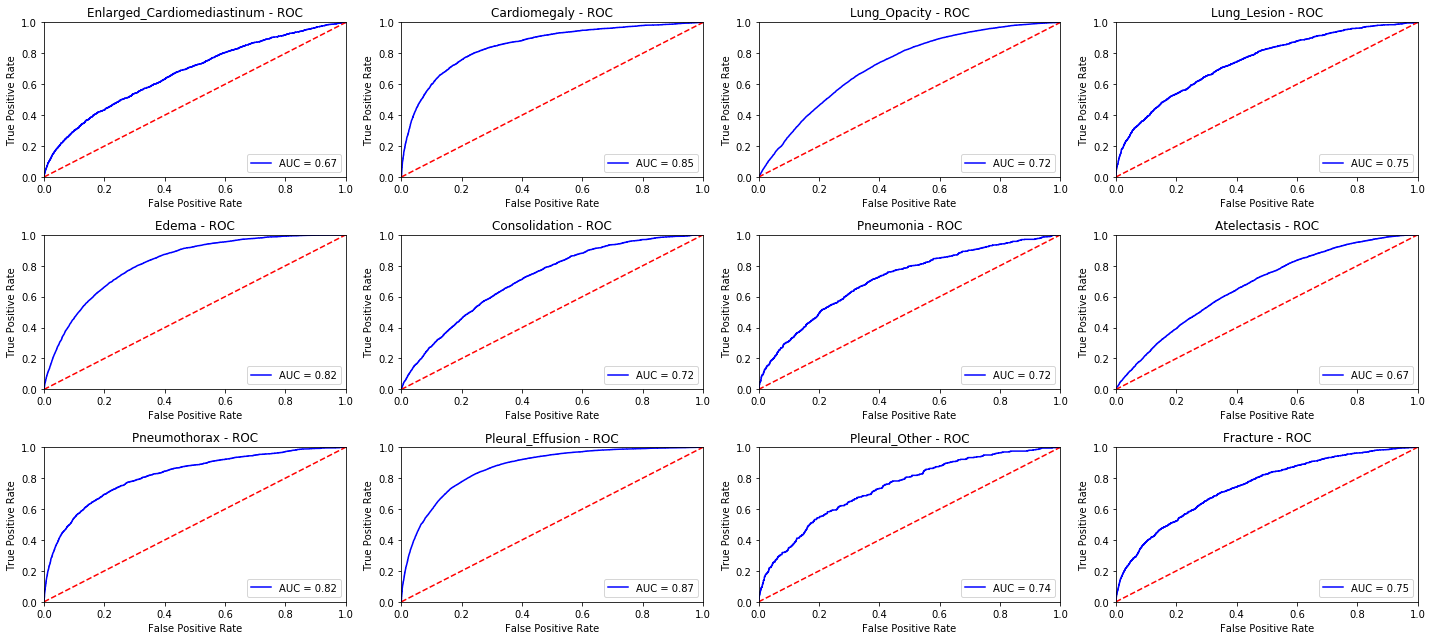

***** Precision / Recall *****


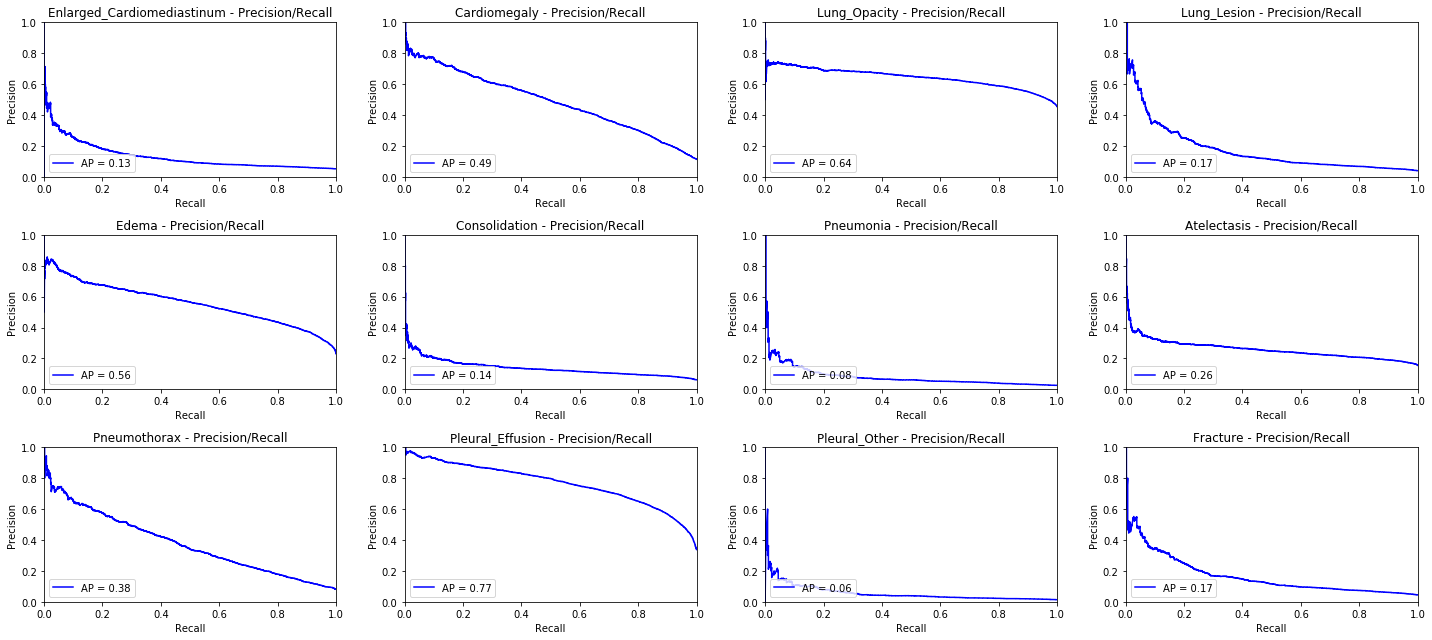

In [7]:
standardTraining.displayMetrics()